In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [11]:
data_x, data_y = datasets.load_diabetes(return_X_y = True)
feature_labels = datasets.load_diabetes().feature_names

x_train = data_x[:-20]
x_test = data_x[-20:]

y_train = data_y[:-20]
y_test = data_y[-20:]

In [12]:
model = keras.Sequential([
    layers.Dense(units=4, activation='relu', input_shape=[10]),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=1)
])

In [13]:
model.compile(
    optimizer='adam',
    loss = 'mae'
)

In [14]:
early_stopping = EarlyStopping(
        min_delta = 0.01,
        patience = 20,
        restore_best_weights = True,
)

In [15]:
history = model.fit(
    x_train, y_train , 
    batch_size = 32,
    epochs = 300,
callbacks=[early_stopping])


Epoch 1/300
14/14 [==============================] - 1s 2ms/step - loss: 153.3201
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 153.2623
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 153.1991
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 153.1275
Epoch 5/300
14/14 [==============================] - 0s 1ms/step - loss: 153.0452
Epoch 6/300
14/14 [==============================] - 0s 2ms/step - loss: 152.9501
Epoch 7/300
14/14 [==============================] - 0s 2ms/step - loss: 152.8390
Epoch 8/300
14/14 [==============================] - 0s 2ms/step - loss: 152.7095
Epoch 9/300
14/14 [==============================] - 0s 2ms/step - loss: 152.5577
Epoch 10/300
14/14 [==============================] - 0s 2ms/step - loss: 152.3804
Epoch 11/300
14/14 [==============================] - 0s 1ms/step - loss: 152.1745
Epoch 12/300
14/14 [==============================] - 0s 2ms/step - loss: 151.9384
Epoch 13/300


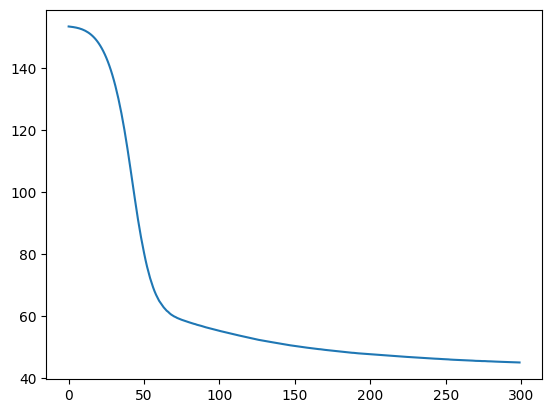

In [16]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();

In [17]:
# Predict on the test data
y_pred = model.predict(x_test)

# Optionally, you can evaluate the performance of your model using metrics like Mean Squared Error (MSE) or R-squared.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

1/1 [==============================] - 0s 64ms/step
Mean Squared Error: 2455.5770191882307
R-squared: 0.491721031969914


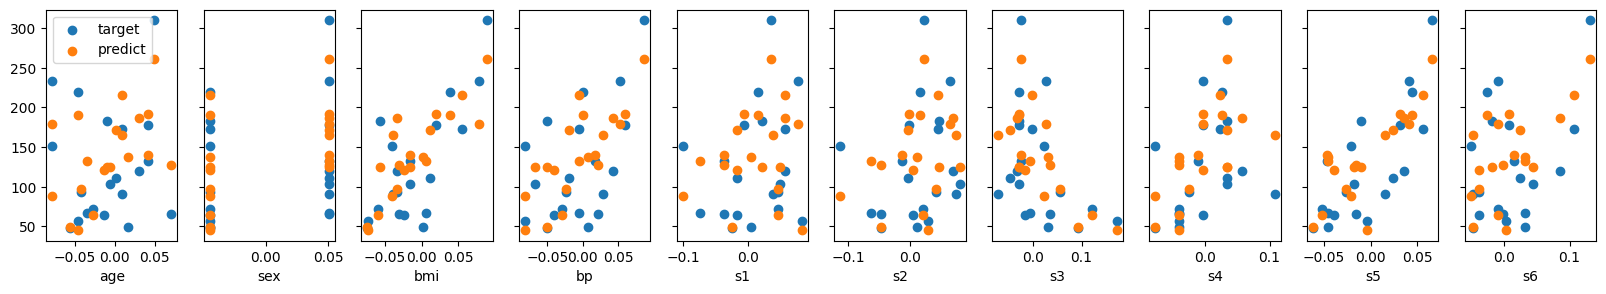

In [18]:
fig,ax=plt.subplots(1,10,figsize=(20,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_test[:,i],y_test, label = 'target')
    ax[i].set_xlabel(feature_labels[i])
    ax[i].scatter(x_test[:,i],y_pred, label = 'predict')
ax[0].legend();
#fig.suptitle("target versus prediction using z-score normalized model")
plt.show()